In [97]:
import pandas as pd
import numpy as np
df = pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [98]:
print("Total Entries: ", len(df))
df.info()

Total Entries:  396030
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 

In [99]:
# checking for features with any null values
df_w_null = df[df.isna().any(axis=1)]
print("Total number of entries with any missing values: ", len(df_w_null))
null_features = df.columns[[
    null_feature_bool for null_feature_bool in df.isna().sum() > 0]]
print("Total null value count: ")
for null_feature in null_features:
    print(
        f"\'{null_feature}\' ({df[null_feature].dtype}): {df[null_feature].isna().sum()}")

Total number of entries with any missing values:  60163
Total null value count: 
'emp_title' (object): 22927
'emp_length' (object): 18301
'title' (object): 1756
'revol_util' (float64): 276
'mort_acc' (float64): 37795
'pub_rec_bankruptcies' (float64): 535


### Handling Object type missing variables

In [101]:
# Since `Title` and `Purpose` are solving the same purpose in the dataset, and title already has over 1756 null values, we drop that column
df.drop('title', axis=1, inplace=True)
null_features = list(null_features)
null_features.remove('title')

In [102]:
# Checking for the percentage of data with missing emp_title & emp_lenggh
len(df[df['emp_title'].isna() & df['emp_length'].isna()])/len(df)

0.045761684720854484

In [103]:
# since rows with both emp_title and emp_length are missing make up less than 5% of the dataset, we can infert that it is safe to drop those entries
df.drop(df[df['emp_title'].isna() & df['emp_length'].isna()].index, axis=0, inplace=True)

In [104]:
df_w_null = df[df.isna().any(axis=1)]
print("Total number of entries with any missing values: ", len(df_w_null))
df[null_features].isna().sum()

Total number of entries with any missing values:  40508


emp_title                4804
emp_length                178
revol_util                266
mort_acc                36788
pub_rec_bankruptcies      535
dtype: int64

In [105]:
# Now considering we have around 5000 entries for emp_title which are null, we first create a new column to fetch the state name and remove the address column
df["emp_state"] = df.address.apply(lambda x: x.split()[-2])
df.drop("address", axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,emp_state
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,OK
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,SD
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,WV
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,MA
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,VA


In [106]:
# Converting the emp_length to numeric keeping <1 -> 0 and 10+ as 10 and others as numeric
df['emp_length'] = df['emp_length'].apply(lambda x: '0 years' if '<' in str(x) else x)
df['emp_length'] = df['emp_length'].apply(lambda x: int(str(x).strip('<').strip(
    "year").strip("years").replace("+", "")) if x is not np.nan else np.nan)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,emp_state
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,OK
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,SD
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,WV
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,MA
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,VA


In [107]:
# Grouping by state, checking for null emp_title
df.loc[:, ["emp_state", "emp_length", "emp_title"]].sort_values(["emp_state", "emp_title"])

,emp_state,emp_length,emp_title
303044,AA,2.0,Area Leader
343856,AA,10.0,Bice president fixed income sales
63977,AA,1.0,Claims Adjuster
259581,AA,6.0,General Accounting Supervisor
63284,AA,10.0,INTELLIGENCE ANSLYST
...,...,...,...
379093,WY,10.0,NaN
382762,WY,0.0,NaN
383371,WY,10.0,NaN
386245,WY,10.0,NaN


In [112]:
df.groupby(['emp_state', 'emp_length'])["emp_title"].apply(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# .fillna(method='most_frequent')

emp_state  emp_length        
AA         0.0         45                        Home attendant 
                       92           PA Leadership Charter School
                       307                                  ATPA
                       473       Z'Tejas Restaurant Holdings, LP
                       705                   Assistant Professor
                                              ...               
WY         10.0        395378                  Managing Director
                       395398     Business Manager/:Public Works
                       395624              SS/PI Program Manager
                       395815             Drive/Material Handler
                       396008           Elmhurst Hospital Center
Name: emp_title, Length: 377729, dtype: object

In [2]:
df.describe(include=np.number)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


[]

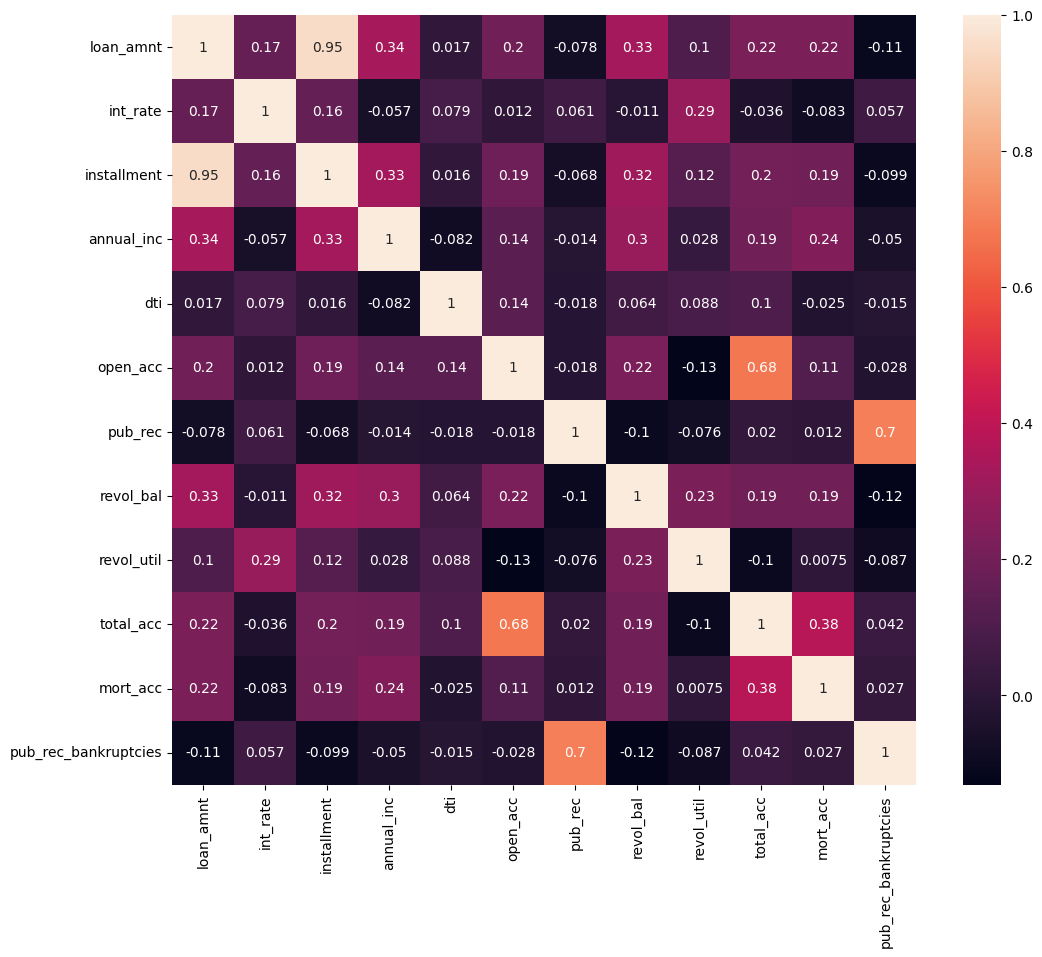

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.plot()